In [1]:
import numpy as np
import matplotlib.pyplot as plt

def transition_probability(drift):
    """
    Calculates the transition probability for the given drift.
    """
    return 1 / (2 * drift + 1)

def get_state(drift):
    """
    Generates a random state within the given drift range.
    """
    return np.random.randint(-drift, drift, dtype=int) 

def policy_evaluation(policy, gamma=0.99):
    """
    Performs policy evaluation using dynamic programming.
    """
    start_price, strike_price = 500, 510
    drift = 10  # Change in stock price on each day
    T = 10  # Number of days till expiry

    V = np.zeros((2 * T * drift + 1, T + 1))

    for t in reversed(range(T)):
        Q = np.zeros((2 * T * drift + 1, 2))
        for state in range(2 * T * drift + 1):
            for action in range(policy[t][state] + 1):
                new_value = 0.0
                if action == 0:
                    reward = 0
                    for next_state in range(state - drift, state + drift):
                        new_value += transition_probability(drift) * (reward + gamma * V[max(0, min(2 * T * drift, next_state))][t + 1])
                else:
                    reward = max(0, state - (strike_price - start_price) - T * drift)
                    new_value = reward
                Q[state][action] = new_value
            V[state][t] = max(Q[state])

    return V

def policy_iteration(gamma=0.99, theta=1e-6, max_iterations=100):
    """
    Performs policy iteration to find the optimal policy.
    """
    start_price, strike_price = 500, 510
    drift = 10  # Change in stock price on each day
    T = 10  # Number of days till expiry
    V = np.zeros((2 * T * drift + 1, T + 1))

    policy = np.random.randint(2, size=(T, 2 * T * drift + 1))
    
    for i in range(max_iterations):
        policy_changed = False
        V = policy_evaluation(policy)
        Q = np.zeros((2 * T * drift + 1, T, 2))

        for t in reversed(range(T)):
            for state in range(2 * T * drift + 1):
                for action in [0, 1]:
                    new_value = 0.0
                    if action == 0:
                        reward = 0
                        for next_state in range(state - drift, state + drift):
                            new_value += transition_probability(drift) * (reward + gamma * V[max(0, min(2 * T * drift, next_state))][t + 1])
                    else:
                        reward = max(0, state - (strike_price - start_price) - T * drift)
                        new_value = reward
                    Q[state][t][action] = new_value
                
                V[state][t] = max(Q[state][t])
                old_action = policy[t][state]
                if Q[state][t][0] >= Q[state][t][1]:
                    policy[t][state] = 0
                else:
                    policy[t][state] = 1
                new_action = policy[t][state]
                policy_changed = (True if new_action is not old_action else old_action)

        if not policy_changed:
            break
    
    # Extracting the optimal policy
    optimal = []
    for t in range(T):
        for i in reversed(range(2 * T * drift + 1)):
            if policy[t][i] == 0:
                optimal.append(i - T * drift + start_price)
                break
    return optimal, policy.tolist()


In [2]:
op,pol = policy_iteration()

In [3]:
print("Policy is: ")
for k in pol:
    print(k)

Policy is: 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [4]:
for price in op:
    print("Optimal Stopping Time is: ", price)

Optimal Stopping Time is:  519
Optimal Stopping Time is:  519
Optimal Stopping Time is:  518
Optimal Stopping Time is:  518
Optimal Stopping Time is:  518
Optimal Stopping Time is:  517
Optimal Stopping Time is:  517
Optimal Stopping Time is:  516
Optimal Stopping Time is:  514
Optimal Stopping Time is:  510


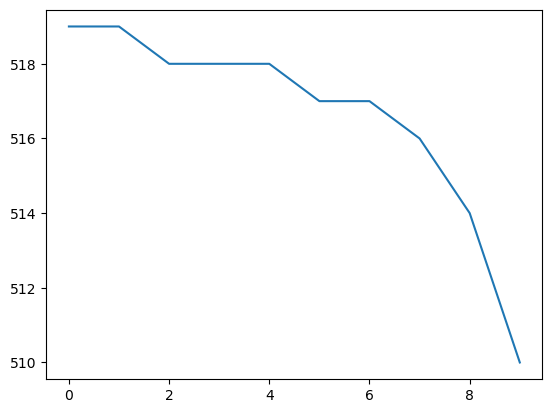

In [5]:
plt.plot(op)